# eCommerce Transactions Dataset 
## Exploratory Data Analysis(EDA)



In [1]:
#importing libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### Library version information:

In [2]:
print("pandas version:" ,pd.__version__)
print("numpy version:",np.__version__)
print("seaborn version:",sns.__version__)

pandas version: 1.5.3
numpy version: 1.24.0
seaborn version: 0.12.2


### Loading Datasets

In [3]:
original_customers_df = pd.read_csv("dataset/Customers.csv")
original_products_df = pd.read_csv("dataset/Products.csv")
original_transactions_df = pd.read_csv("dataset/Transactions.csv")

### Creating a Copy of the Original DataFrame
[safe practice]

In [4]:
customers_df = original_customers_df
products_df = original_products_df
transactions_df = original_transactions_df

## Exploring Customer Dataset

In [5]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [6]:
customers_df.info()

# Check for missing values
customers_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [7]:
customers_df.duplicated().sum()

0

In [8]:
# Convert SignupDate column to datetime format
customers_df["SignupDate"] = pd.to_datetime(customers_df["SignupDate"])

customers_df.dtypes


CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object

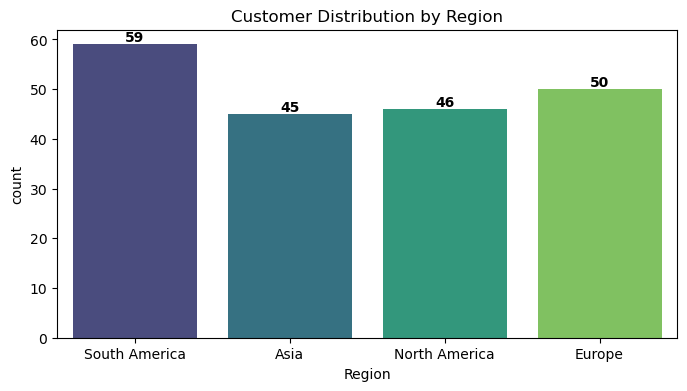

In [9]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=customers_df, x="Region", palette="viridis")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Customer Distribution by Region")
plt.show()

### **Insights from Customer Data Exploration**

- ✅ **No Missing Values:** The Customers dataset does not contain any null values.  
- ✅ **No Duplicates:** There are no duplicate records in the dataset.  
- 🌍 **Customer Distribution by Region:**  
  - **South America:** 59 customers  
  - **Asia:** 45 customers  
  - **North America:** 46 customers  
  - **Europe:** 50 customers  
- "The customer distribution across regions appears **fairly balanced, with no significant skewness."**


## Exploring Products Dataset

In [10]:
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [11]:
products_df.info()

# Check for missing values
products_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [12]:
products_df.duplicated().sum()

0

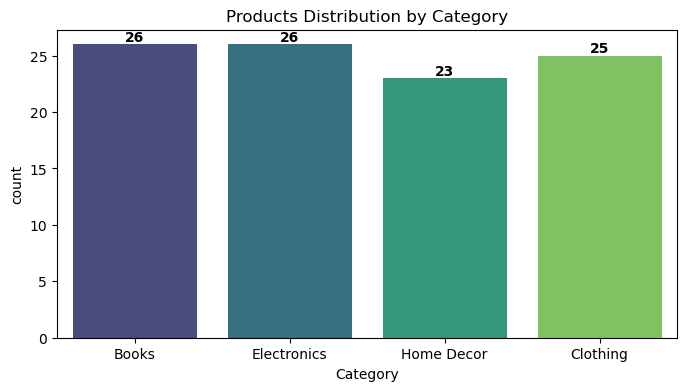

In [13]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=products_df, x="Category", palette="viridis")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Products Distribution by Category")
plt.show()

In [14]:
products_df["Price"].describe()

count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64

### **Insights from Products Data Exploration**  

- ✅ **No Missing Values:** The Products dataset does not contain any null values.  
- ✅ **No Duplicates:** There are no duplicate records in the dataset.  

#### **📦 Product Distribution by Category:**  
- **Books:** 26 Products  
- **Electronics:** 26 Products  
- **Home Decor:** 23 Products  
- **Clothing:** 25 Products  

📊 **Balanced Distribution:**  
- The product distribution across categories appears **fairly balanced**, with no significant skewness.  

💰 **Wide Price Range:**  
- Product prices vary significantly, from **\$16.08** to **\$497.76**, indicating a mix of **budget and premium products**.  


## Exploring TransactionsDataset

In [15]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [16]:
transactions_df.info()

# Check for missing values
transactions_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

### Typecasting TransactionDate Columns

In [17]:
transactions_df["TransactionDate"] = pd.to_datetime(transactions_df["TransactionDate"])
transactions_df.dtypes

TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object

In [18]:
start_date= transactions_df["TransactionDate"].min()
end_date= transactions_df["TransactionDate"].max()
print(f"we have data from {start_date} to {end_date}")

we have data from 2023-12-30 15:29:12 to 2024-12-28 11:00:00


In [19]:
transactions_df.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


### **🔍 Insight from Transactions Data**  

- We have **1,000 transactions** recorded in the dataset.  
- The **TransactionDate** column needs to be **converted to datetime format** for accurate time-based analysis.  
- **No missing values** were found in the transaction data, ensuring data completeness.  
- we have data from **2023-12-30**  to **2024-12-28**.

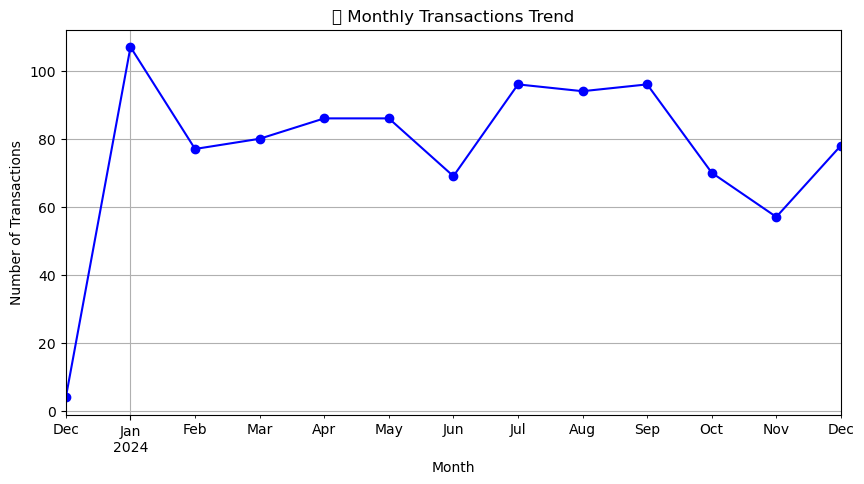

In [20]:
# Group by month and count transactions
transactions_df['Month'] = transactions_df['TransactionDate'].dt.to_period('M')
monthly_trend = transactions_df.groupby('Month')['TransactionID'].count()

# Plot
plt.figure(figsize=(10, 5))
monthly_trend.plot(kind='line', marker='o', color='b')
plt.title("📅 Monthly Transactions Trend")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.show()


### **📊 Transaction Trends (2024)**  

- **January 2024** recorded **100+ transactions**, the highest of the year.  
- **November 2024** had the **lowest number of transactions**.  
- **July, August, and September 2024** each saw **90+ transactions**, indicating steady sales during these months.  


## Most Popular Product

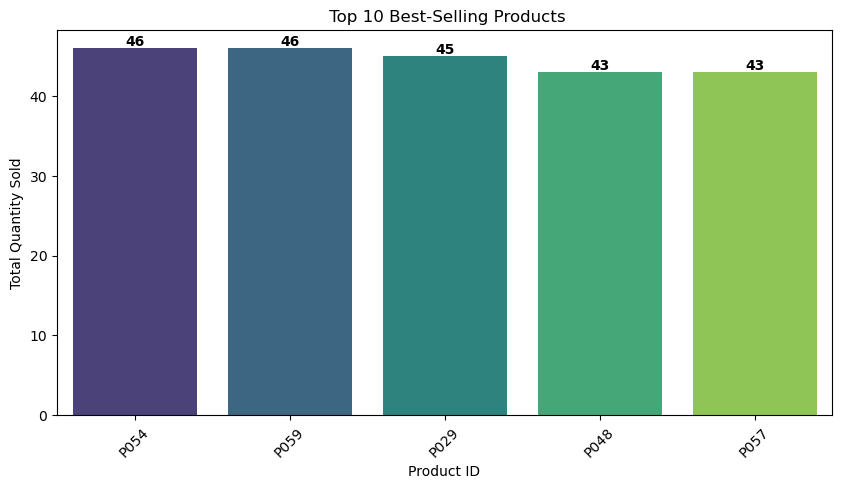

In [21]:

# Group by ProductID and sum quantity sold
top_products = transactions_df.groupby('ProductID')['Quantity'].sum().nlargest(5)

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title(" Top 10 Best-Selling Products")
plt.xlabel("Product ID")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()


In [22]:
products = products_df.loc[products_df['ProductID'].isin(['P054','P058','P029','P048','P057']), ['ProductID', 'ProductName']]

# Display the result
print(products)

   ProductID            ProductName
28      P029     TechPro Headphones
47      P048       TechPro Cookbook
53      P054     SoundWave Cookbook
56      P057  ActiveWear Smartphone
57      P058    ActiveWear Textbook


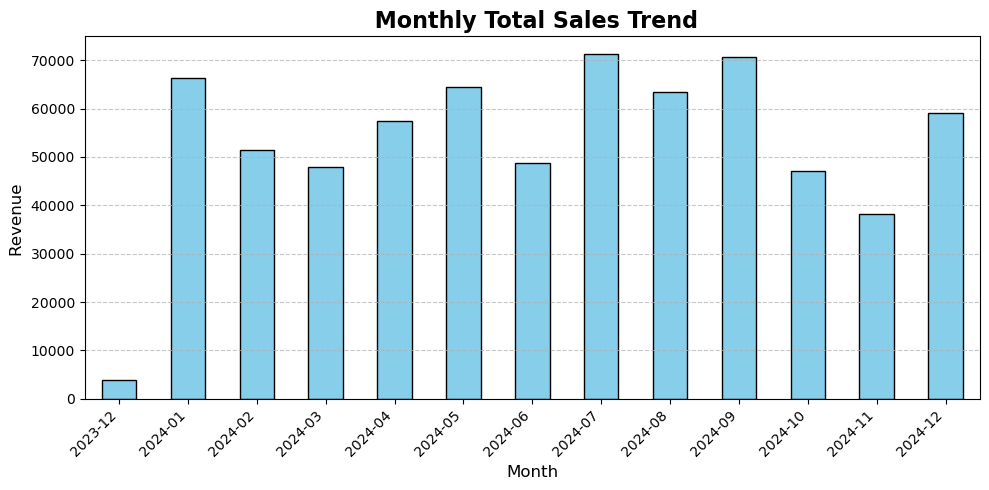

In [23]:
monthly_trend = transactions_df.groupby('Month')['TotalValue'].sum()

# Plot
plt.figure(figsize=(10, 5))
monthly_trend.plot(kind='bar', color='skyblue', edgecolor='black')  # Bar plot with custom color
plt.title(" Monthly Total Sales Trend", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue ", fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()


###  Monthly Sales Insights 

- The **highest sales** were recorded in **July** and **September 2024**, each with **$70,000** in sales.  
- The **lowest sales** were recorded in **November 2024**, marking a drop in transactions during that month.  
- Data for **December** starts from **30th December**, so it cannot be considered for the lowest sales comparison.


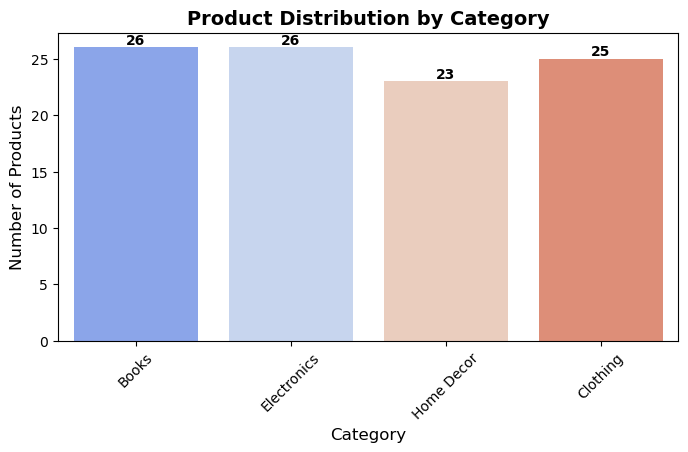

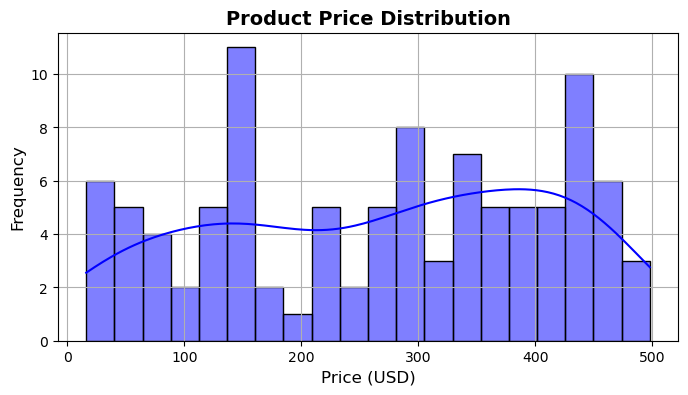

In [24]:
# Count of products by category
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=products_df, x="Category", palette="coolwarm")

# Add count labels on top
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Product Distribution by Category", fontsize=14, fontweight='bold')
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Product Price Distribution
plt.figure(figsize=(8, 4))
sns.histplot(products_df['Price'], bins=20, kde=True, color='blue')
plt.title("Product Price Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Price (USD)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.show()


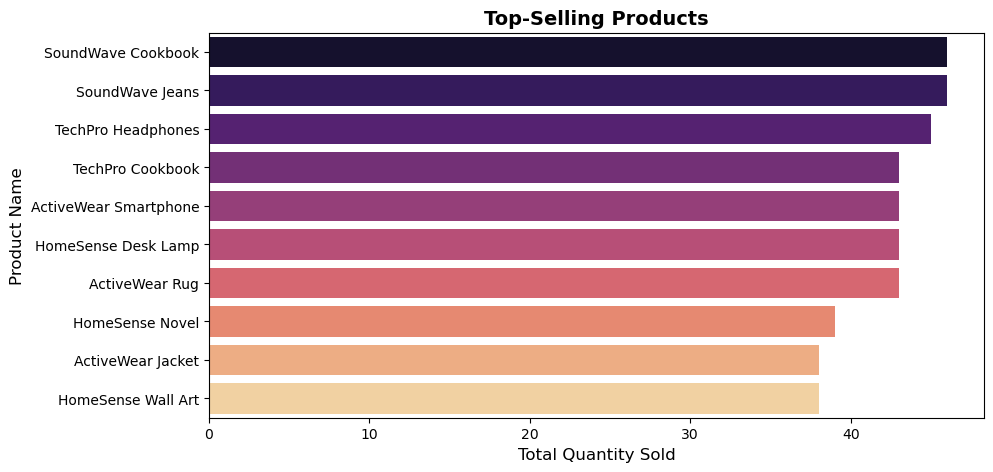

In [25]:
# Top-selling products
top_products = transactions_df.groupby('ProductID')['Quantity'].sum().nlargest(10).reset_index()
top_products = top_products.merge(products_df, on='ProductID', how='left')

# Plot top products
plt.figure(figsize=(10, 5))
sns.barplot(data=top_products, y='ProductName', x='Quantity', palette="magma")
plt.title("Top-Selling Products", fontsize=14, fontweight='bold')
plt.xlabel("Total Quantity Sold", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.show()


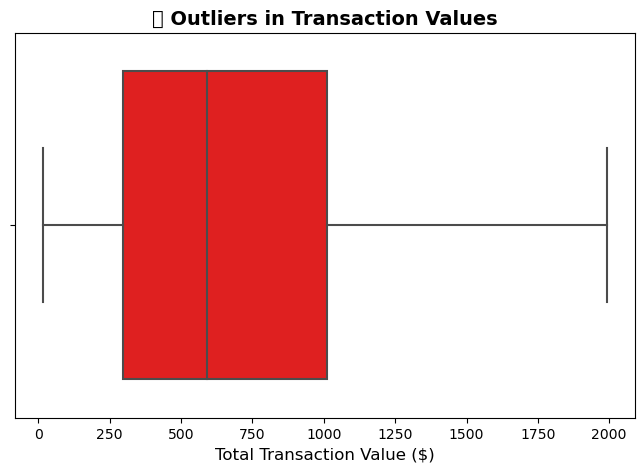

In [26]:
# Boxplot for TotalValue to detect anomalies
plt.figure(figsize=(8, 5))
sns.boxplot(x=transactions_df['TotalValue'], color='red')
plt.title("🚨 Outliers in Transaction Values", fontsize=14, fontweight='bold')
plt.xlabel("Total Transaction Value ($)", fontsize=12)
plt.show()


Month wise product category sale


In [27]:
Month_wise_catogory = transactions_df[["ProductID","TotalValue","Month"]]
Month_wise_catogory = Month_wise_catogory.merge(products_df,on= "ProductID",how="left")
Month_wise_catogory

,ProductID,TotalValue,Month,ProductName,Category,Price
0,P067,300.68,2024-08,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,P067,300.68,2024-05,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,P067,300.68,2024-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,P067,601.36,2024-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,P067,902.04,2024-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...
995,P037,459.86,2024-10,SoundWave Smartwatch,Electronics,459.86
996,P037,1379.58,2024-06,SoundWave Smartwatch,Electronics,459.86
997,P037,1839.44,2024-04,SoundWave Smartwatch,Electronics,459.86
998,P037,919.72,2024-09,SoundWave Smartwatch,Electronics,459.86


In [28]:
# Ensure 'Month' is in datetime format
Month_wise_catogory["Month"] = Month_wise_catogory["Month"].dt.to_timestamp()

# Group by Month and Category, then sum TotalValue
month_category_sales = Month_wise_catogory.groupby([Month_wise_catogory["Month"].dt.month, "Category"])["TotalValue"].sum().reset_index()

# Rename the month column for clarity
month_category_sales.rename(columns={"Month": "Month_Number"}, inplace=True)

# Display the result
print(month_category_sales)




    Month_Number     Category  TotalValue
0              1        Books    17515.05
1              1     Clothing    17984.46
2              1  Electronics    16786.31
3              1   Home Decor    14090.57
4              2        Books    21073.17
5              2     Clothing     8091.81
6              2  Electronics     8556.44
7              2   Home Decor    13737.85
8              3        Books     9091.55
9              3     Clothing     7520.12
10             3  Electronics    15383.29
11             3   Home Decor    15833.77
12             4        Books    11270.08
13             4     Clothing    14454.24
14             4  Electronics    18390.58
15             4   Home Decor    13404.16
16             5        Books    21793.32
17             5     Clothing    17236.32
18             5  Electronics    12244.79
19             5   Home Decor    13253.31
20             6        Books    16270.05
21             6     Clothing    13217.41
22             6  Electronics     

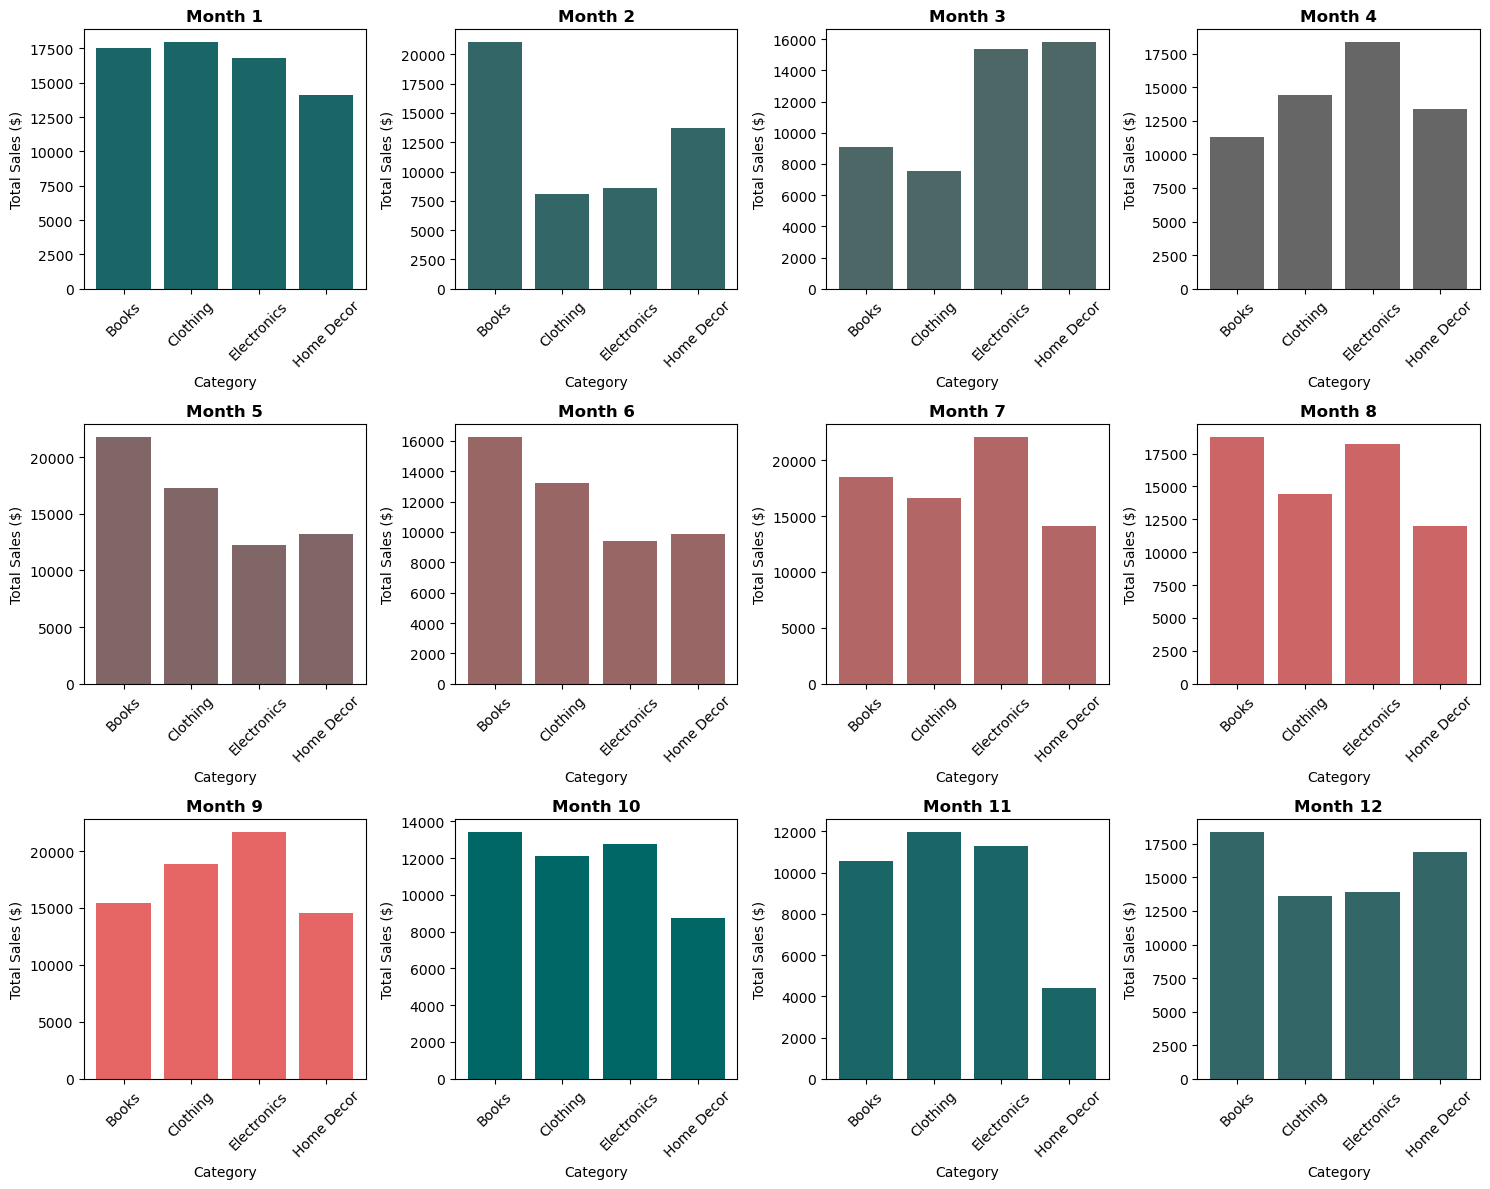

In [29]:
import matplotlib.pyplot as plt

# Create a single figure for all subplots
plt.figure(figsize=(15, 12))  

# Loop through months 1 to 12
for i in range(1, 13):
    graph_mcs = month_category_sales[month_category_sales["Month_Number"] == i]
    
    # Create subplot (3 rows, 4 columns)
    ax = plt.subplot(3, 4, i)  
    
    # Bar plot
    ax.bar(graph_mcs["Category"], graph_mcs["TotalValue"], color= ((i/10)%1,0.4,0.4))  
    
    # Title and labels
    ax.set_title(f"Month {i}", fontsize=12, fontweight='bold')
    ax.set_xlabel("Category", fontsize=10)
    ax.set_ylabel("Total Sales ($)", fontsize=10)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()  
plt.show()

    